In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import DistanceMetric

import seaborn as sns

In [2]:
df = pd.read_csv("jsondata.csv")

In [7]:
df["singular"] = np.random.randint(0,5, len(df))
df["plural"] = np.random.randint(0,2, len(df))
df

,filename,lon,lat,result_string,singular,plural
0,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737938,10.795654,"other.dump 1,",1,0
1,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737968,10.795668,"other.dump 1,",0,1
2,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737968,10.795668,"other.dump 1,",3,1
3,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737968,10.795668,"other.dump 1,",0,1
4,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.739403,10.796682,"other.dump 1,",0,0
...,...,...,...,...,...,...
56563,https://olm-s3.s3.eu-west-1.amazonaws.com/2021...,6.148425,52.792167,"softdrinks.tinCan 1,",0,1
56564,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,-121.198683,36.481358,"other.metal 1,",1,1
56565,https://olm-s3.s3.eu-west-1.amazonaws.com/2021...,4.736838,52.485755,"softdrinks.energy_can 1,brands.redbull 1,",0,0
56566,https://olm-s3.s3.eu-west-1.amazonaws.com/2021...,4.736853,52.485753,"softdrinks.energy_can 1,brands.redbull 1,",2,0


In [8]:
# # 54.8658625158094, -11.005507239439002
# # 52.10631850314985, -5.725175181186062

# df_ir = df[(df.lat > 52) &
#             (df.lat < 55) &
#             (df.lon > -11) &
#             (df.lon < -6)]
# df_ir

In [9]:
# # 49.84796050030503, -5.567337371631039
# # 58.89887085945355, 2

# df_gb = df[(df.lat > 50) &
#             (df.lat < 59) &
#             (df.lon > -5.5) &
#             (df.lon < 2)]
# df_gb

In [18]:
df_sel = df[:20000]
df_sel

,filename,lon,lat,result_string,singular,plural
0,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737938,10.795654,"other.dump 1,",1,0
1,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737968,10.795668,"other.dump 1,",0,1
2,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737968,10.795668,"other.dump 1,",3,1
3,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737968,10.795668,"other.dump 1,",0,1
4,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.739403,10.796682,"other.dump 1,",0,0
...,...,...,...,...,...,...
19995,https://olm-s3.s3.eu-west-1.amazonaws.com/2019...,4.677183,52.482914,"alcohol.beerCan 1,",2,0
19996,https://olm-s3.s3.eu-west-1.amazonaws.com/2019...,4.677189,52.482900,"alcohol.beerCan 1,",1,1
19997,https://olm-s3.s3.eu-west-1.amazonaws.com/2019...,4.753431,52.495964,"alcohol.beerCan 1,",1,1
19998,https://olm-s3.s3.eu-west-1.amazonaws.com/2019...,4.753506,52.496444,"alcohol.beerCan 1,",0,0


In [19]:
%%time
df_sel['lat_radians'] = np.radians(df_sel['lat'])
df_sel['lon_radians'] = np.radians(df_sel['lon'])

dist = DistanceMetric.get_metric('haversine')
dist_matrix = dist.pairwise(df_sel[['lat_radians','lon_radians']].to_numpy())*6373000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CPU times: user 25.2 s, sys: 749 ms, total: 25.9 s
Wall time: 25.8 s


In [20]:
# %%time
# dist_matrix_adjusted_with_bearing = []
# for i, row in enumerate(dist_matrix):
#     ANGLE_DIFF = 20
#     DIST_BETWEEN_POINTS_COUNTER_BEARING = 10000
#     bearing_diff = angle_diff(outliers_pd_geo['bearing'][i], outliers_pd_geo['bearing'])
#     row[np.where(np.greater(bearing_diff, ANGLE_DIFF))] = DIST_BETWEEN_POINTS_COUNTER_BEARING
#     dist_matrix_adjusted_with_bearing.append(row)

In [21]:
# # np.save("dist_matrix_gb.npy", dist_matrix)
# dist_matrix = np.load("dist_matrix_gb.npy")

In [22]:
%%time
clusterer = AgglomerativeClustering(linkage = "complete", distance_threshold = 20, n_clusters = None,
                                   affinity = "precomputed")
clust = clusterer.fit(dist_matrix)

CPU times: user 9.47 s, sys: 1.44 s, total: 10.9 s
Wall time: 10.9 s


In [23]:
labels = clusterer.labels_
np.unique(labels).shape
df_sel['cluster'] = labels

df_sel

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,filename,lon,lat,result_string,singular,plural,lat_radians,lon_radians,cluster
0,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737938,10.795654,"other.dump 1,",1,0,0.188420,1.862928,2602
1,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737968,10.795668,"other.dump 1,",0,1,0.188420,1.862929,2602
2,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737968,10.795668,"other.dump 1,",3,1,0.188420,1.862929,2602
3,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.737968,10.795668,"other.dump 1,",0,1,0.188420,1.862929,2602
4,https://olm-s3.s3.eu-west-1.amazonaws.com/2020...,106.739403,10.796682,"other.dump 1,",0,0,0.188438,1.862954,5289
...,...,...,...,...,...,...,...,...,...
19995,https://olm-s3.s3.eu-west-1.amazonaws.com/2019...,4.677183,52.482914,"alcohol.beerCan 1,",2,0,0.916000,0.081632,3254
19996,https://olm-s3.s3.eu-west-1.amazonaws.com/2019...,4.677189,52.482900,"alcohol.beerCan 1,",1,1,0.915999,0.081632,3254
19997,https://olm-s3.s3.eu-west-1.amazonaws.com/2019...,4.753431,52.495964,"alcohol.beerCan 1,",1,1,0.916227,0.082963,6478
19998,https://olm-s3.s3.eu-west-1.amazonaws.com/2019...,4.753506,52.496444,"alcohol.beerCan 1,",0,0,0.916236,0.082964,567


In [24]:
df_sel.cluster.nunique()

6963

In [25]:
THRESHOLD = 6 #how many litter items we need to declare "dumping"
cluster_labels = df_sel.groupby("cluster").apply(lambda gr: "dumping" if gr["plural"].sum() > 0 else "dumping" if gr["singular"].sum() > THRESHOLD else "litter")
cluster_labels.value_counts()

dumping    5055
litter     1908
dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='Count'>

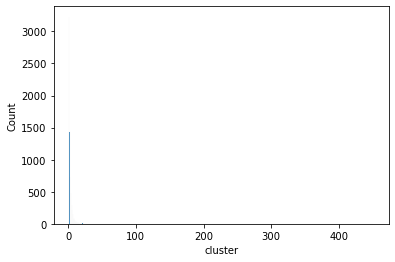

In [26]:
sns.histplot(df_sel.cluster.value_counts())